In [1]:
import os
import pandas as pd
import datetime, time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_hdf("all_wind.h5")

In [21]:
df.head(5)

,trajectory__DCoffset,trajectory__boutFrame,trajectory__case,trajectory__compensation,trajectory__gain,trajectory__groundSpeed,trajectory__headingControl,trajectory__impose,trajectory__imposeHeading,trajectory__imposeResponse,...,trajectory__trial,trajectory__valve1,trajectory__valve2,trajectory__valve3,trajectory__wbad,trajectory__wbas,windPressure,visual,flowSource,timeStamp
2018-01-17 09:08:18.538726144,-0.02,0.0,0.0,0.0,8.0,432.812959,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.112766,1.906645,0.,grassSky,direct,2018-01-17__14~38~15
2018-01-17 09:08:18.542435840,-0.02,0.0,0.0,0.0,8.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.112766,1.906645,0.,grassSky,direct,2018-01-17__14~38~15
2018-01-17 09:08:18.547606016,-0.02,0.0,0.0,0.0,8.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.112766,1.906645,0.,grassSky,direct,2018-01-17__14~38~15
2018-01-17 09:08:18.553721856,-0.02,0.0,0.0,0.0,8.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.112766,1.982512,0.,grassSky,direct,2018-01-17__14~38~15
2018-01-17 09:08:18.559709184,-0.02,0.0,0.0,0.0,8.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.112766,1.982512,0.,grassSky,direct,2018-01-17__14~38~15


In [22]:
files=df.timeStamp.unique()


# hierarchy of data



In [6]:
for file in files: #for each file
    df2 = df[df.timeStamp==file]
    wind_pressure_s = df2.windPressure.unique()
    for wind in wind_pressure_s: # for each wind speed in that file
        visual_s = df2[df2.windPressure==wind].visual.unique()
        for visual in visual_s: # for each visual stimulus type
                case_s = df2[(df2.windPressure==wind) & (df2.visual == visual) ].trajectory__case.unique()
                print(file ,"-->",wind,"-->",visual,"-->",case_s)


2018-01-17__14~38~15 --> 0. --> grassSky --> [0. 1. 2. 3.]
2018-01-24__17~19~46 --> 0. --> grassSky --> [0. 1. 2. 3.]
2018-01-17__14~43~47 --> 0.5 --> grassSky --> [0. 1. 2. 3.]
2018-01-24__17~29~08 --> 0.5 --> grassSky --> [0. 1. 2. 3.]
2018-01-17__14~58~16 --> 1. --> grassSky --> [0. 1. 2. 3.]
2018-01-24__17~39~42 --> 1. --> grassSky --> [0. 1. 2. 3.]
2018-01-24__20~45~24 --> 1. --> grassSky --> [0. 1. 2. 3.]
2018-01-17__17~54~40 --> 1.5 --> grassSky --> [0. 1. 2. 3.]
2018-01-24__19~47~36 --> 1.5 --> grassSky --> [0. 1. 2. 3.]
2018-01-24__20~54~18 --> 1.5 --> grassSky --> [0. 1. 2. 3.]
2018-01-17__18~12~12 --> 2. --> grassSky --> [0. 1. 2. 3.]
2018-01-24__20~00~59 --> 2. --> grassSky --> [0. 1. 2. 3.]
2018-01-17__18~19~48 --> 2.5 --> grassSky --> [0. 1. 2. 3.]
2018-01-24__20~20~12 --> 2.5 --> grassSky --> [0. 1. 2. 3.]
2018-01-24__20~27~48 --> 3. --> grassSky --> [0. 1. 2. 3.]
2018-01-24__20~36~56 --> 3.5 --> grassSky --> [0. 1. 2. 3.]
2018-01-17__18~39~31 --> 0. --> grassSky --> [0.

In [7]:
for file in files: #for each file
    df2 = df[df.timeStamp==file]
    wind_pressure_s = df2.windPressure.unique()
    for wind in wind_pressure_s: # for each wind speed in that file
        visual_s = df2[df2.windPressure==wind].visual.unique()
        for visual in visual_s: # for each visual stimulus type
                case_s = df2[(df2.windPressure==wind) & (df2.visual == visual) ].trajectory__case.unique()
                print(file ,"-->",wind,"-->",visual,"-->",case_s)
                for case in case_s:
                    df3=df2[df2.trajectory__case==case ]
                    if(df3.shape[0] >0):
                        print("\t\tcase-->",case,"trial-->",df3.trajectory__trial.unique(),"runNum-->",df3.trajectory__runNum.unique())


2018-01-17__14~38~15 --> 0. --> grassSky --> [0. 1. 2. 3.]
		case--> 0.0 trial--> [1.] runNum--> [1. 2. 3. 4. 5. 6.]
		case--> 1.0 trial--> [2.] runNum--> [1. 2. 3. 4. 5.]
		case--> 2.0 trial--> [3.] runNum--> [1. 2. 3. 4. 5.]
		case--> 3.0 trial--> [4.] runNum--> [1. 2. 3. 4. 5.]
2018-01-24__17~19~46 --> 0. --> grassSky --> [0. 1. 2. 3.]
		case--> 0.0 trial--> [1.] runNum--> [1. 2. 3. 4. 5. 6.]
		case--> 1.0 trial--> [2.] runNum--> [1. 2. 3. 4. 5. 6.]
		case--> 2.0 trial--> [3.] runNum--> [1. 2. 3. 4. 5.]
		case--> 3.0 trial--> [4.] runNum--> [1. 2. 3. 4. 5.]
2018-01-17__14~43~47 --> 0.5 --> grassSky --> [0. 1. 2. 3.]
		case--> 0.0 trial--> [1.] runNum--> [1. 2. 3. 4. 5. 6. 7.]
		case--> 1.0 trial--> [2.] runNum--> [1. 2. 3. 4. 5. 6. 7.]
		case--> 2.0 trial--> [3.] runNum--> [1. 2. 3. 4. 5. 6.]
		case--> 3.0 trial--> [4.] runNum--> [1. 2. 3. 4. 5. 6.]
2018-01-24__17~29~08 --> 0.5 --> grassSky --> [0. 1. 2. 3.]
		case--> 0.0 trial--> [1.] runNum--> [1. 2. 3. 4. 5. 6. 7. 8. 9.]
		case--

In [23]:
#removing unnecessary columns
for nam in df.columns:
    if len(df[nam].unique()) == 1 :
        print(nam)
        df.drop([nam],axis=1,inplace=True)

trajectory__boutFrame
trajectory__compensation
trajectory__gain
trajectory__impose
trajectory__imposeHeading
trajectory__imposeResponse
trajectory__imposeResponseHeading
trajectory__imposeResponseSmooth
trajectory__key
trajectory__o1Pos_x
trajectory__o1Pos_y
trajectory__o1Pos_z
trajectory__o2Pos_x
trajectory__o2Pos_y
trajectory__o2Pos_z
trajectory__pOri_y
trajectory__pOri_z
trajectory__packetDuration
trajectory__packetFrequency
trajectory__pfStimState
trajectory__quadrant
trajectory__speedControl
trajectory__valve1
trajectory__valve2
trajectory__valve3


In [9]:
df.columns

Index(['trajectory__DCoffset', 'trajectory__case', 'trajectory__groundSpeed',
       'trajectory__headingControl', 'trajectory__isFlying',
       'trajectory__pOri_x', 'trajectory__pPos_x', 'trajectory__pPos_y',
       'trajectory__pPos_z', 'trajectory__reset', 'trajectory__runNum',
       'trajectory__servoAngle', 'trajectory__slip', 'trajectory__speed',
       'trajectory__trial', 'trajectory__wbad', 'trajectory__wbas',
       'windPressure', 'visual', 'flowSource', 'timeStamp'],
      dtype='object')

# Wind Pressure for each file for case 1

In [12]:
df.trajectory__servoAngle.unique().shape

(360,)

In [17]:
df.trajectory__wbad.unique().shape

(3210,)

In [8]:
for nam in df.columns:
    if len(df[nam].unique()) == 1 :
        print(nam)
        df.drop([nam],axis=1,inplace=True)

trajectory__boutFrame
trajectory__compensation
trajectory__gain
trajectory__impose
trajectory__imposeHeading
trajectory__imposeResponse
trajectory__imposeResponseHeading
trajectory__imposeResponseSmooth
trajectory__key
trajectory__o1Pos_x
trajectory__o1Pos_y
trajectory__o1Pos_z
trajectory__o2Pos_x
trajectory__o2Pos_y
trajectory__o2Pos_z
trajectory__pOri_y
trajectory__pOri_z
trajectory__packetDuration
trajectory__packetFrequency
trajectory__pfStimState
trajectory__quadrant
trajectory__speedControl
trajectory__valve1
trajectory__valve2
trajectory__valve3


In [7]:
import dash

In [37]:
df.visual.unique()

array(['grassSky', 'null'], dtype=object)

In [45]:
def get_partial_dataSet(fileName,wind_presure,visual,runnum,case):
    return(df[(df.timeStamp == fileName) & (df.windPressure == wind_presure) &
      (df.visual == visual) & (df.trajectory__runNum ==runnum) & df.trajectory__case ==  case])
      
    

In [75]:
zz=get_partial_dataSet(tsl[3],'0.5','grassSky',1,1)

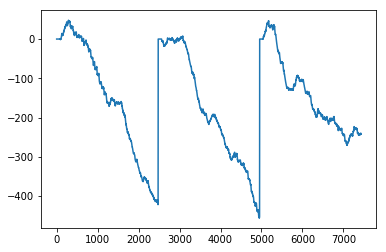

In [77]:
plt.plot(zz.trajectory__pOri_x.values)

In [74]:
df[(df.timeStamp == tsl[3]) & (df.visual == 'grassSky')].windPressure.unique()[0] == '0.5'

True

In [ ]:
def search_data_except(fileName,wind_presure,visual,case):
    files=df.timeStamp.unique()
    files = files[files != fileName]
    for fl in files:
        df[(df.timeStamp == fl) & (df.windPressure == )]

In [78]:
files=df.timeStamp.unique()

In [79]:
tsl[0]

'2018-01-17__14~38~15'

In [85]:
df.trajectory__reset.sum()

1164.0

In [384]:
def get_trajectories_from_orientations(start_point,orientations,step):
    x = start_point[0]
    y = start_point[1]
    ori_x=[x]
    ori_y=[y]
   # print(orientations)
    for ori in orientations:
#         if ori>180 :
#             ori=-1*(360-ori)
        x = x - step*np.sin(np.pi*ori/180)
        y = y + step*np.cos(np.pi*ori/180)
#         x = x + step*np.cos(np.pi*(ori-90)/180)
#         y = y + step*np.sin(np.pi*(ori-90)/180)
        ori_x.append(x)
        ori_y.append(y)
    return(ori_x,ori_y)

In [299]:
orii=df[df.timeStamp == "2018-01-24__20~00~59"].trajectory__pOri_x.values

In [82]:
x,y=get_trajectories_from_orientations((513,513),orii,0.1)

In [ ]:
scatter(x,y,s=3,label="case_"+str(case))

In [56]:
df["current_orientation"]=df.trajectory__pOri_x%360

In [62]:
df["ori_ang_diff"]=(df.current_orientation - df.trajectory__servoAngle)%360
df.ori_ang_diff[df.ori_ang_diff>180] =360-df.ori_ang_diff[df.ori_ang_diff>180] 

/home/lsr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
df.ori_ang_diff.min(),df.ori_ang_diff.max()

(0.0, 180.0)

In [66]:
for file in files: #for each file
    df2 = df[df.timeStamp==file]
    wind_pressure_s = df2.windPressure.unique()
    for wind in wind_pressure_s: # for each wind speed in that file
        visual_s = df2[df2.windPressure==wind].visual.unique()
        for visual in visual_s: # for each visual stimulus type
                case_s = df2[(df2.windPressure==wind) & (df2.visual == visual) ].trajectory__case.unique()
                #print(file ,"-->",wind,"-->",visual,"-->",case_s)
                case_plot = "trajectory_plots/"+file
                if not os.path.exists(case_plot):
                    os.makedirs(case_plot)
                for case in case_s:
                    df3=df2[df2.trajectory__case==case ]
                    if(df3.shape[0] >0):
                        runs_ = df3.trajectory__runNum.unique()
                        plt.figure(figsize=(10,20))
                        for i in runs_:
                            plt.subplot(len(runs_),1,i)
                            plt.plot(df3[df3.trajectory__runNum == i].trajectory__servoAngle)
                            plt.title("C_"+str(case)+"_RNum_"+str(i))
                        plt.savefig(case_plot+"/"+"w_"+wind+"_"+visual+"_C_"+str(case)+".png",bbox_inches = 'tight')
                        plt.close()
                        #print("\t\tcase-->",case,"trial-->",df3.trajectory__trial.unique(),"runNum-->",df3.trajectory__runNum.unique())
                        

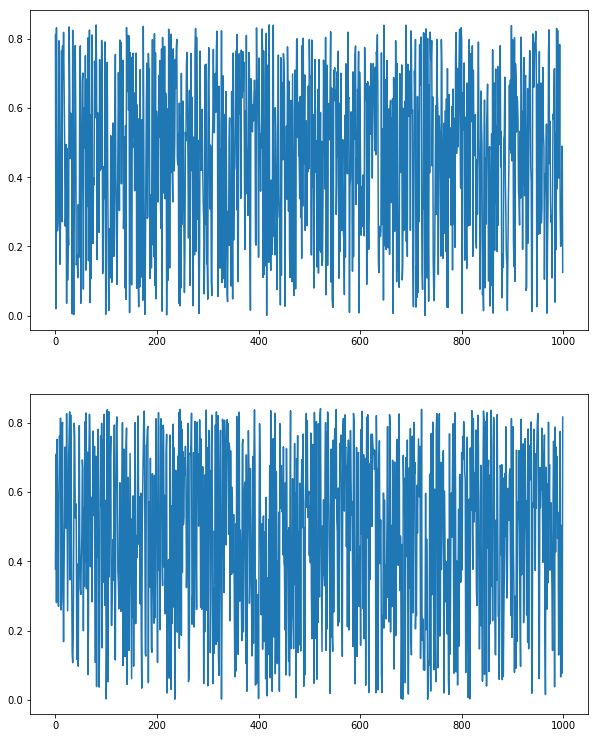

In [48]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
plt.plot(np.sin(np.random.rand(1000)))
plt.subplot(3,1,2)
plt.plot(np.sin(np.random.rand(1000)))
#plt.plot

In [51]:
2500/160

15.625

In [55]:
df3.ori_ang_diff.min()

-358.99990487377363

In [84]:
file

'2018-03-30__14~33~21'

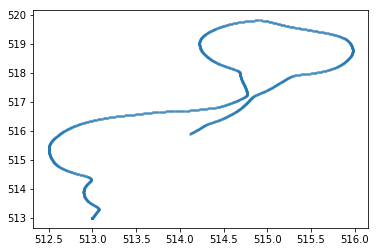

In [315]:
plt.scatter(df3[df3.trajectory__runNum == 1].trajectory__pPos_x,df3[df3.trajectory__runNum == 1].trajectory__pPos_y,s=3,alpha=0.2)

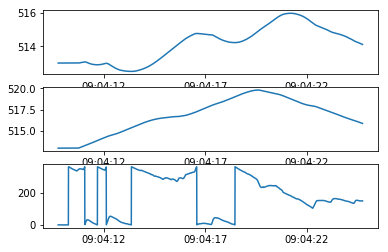

In [301]:
plt.subplot(3,1,1)
plt.plot(df3[df3.trajectory__runNum == 1].trajectory__pPos_x)
plt.subplot(3,1,2)
plt.plot(df3[df3.trajectory__runNum == 1].trajectory__pPos_y)
plt.subplot(3,1,3)
plt.plot(df3[df3.trajectory__runNum == 1].trajectory__pOri_x%360)

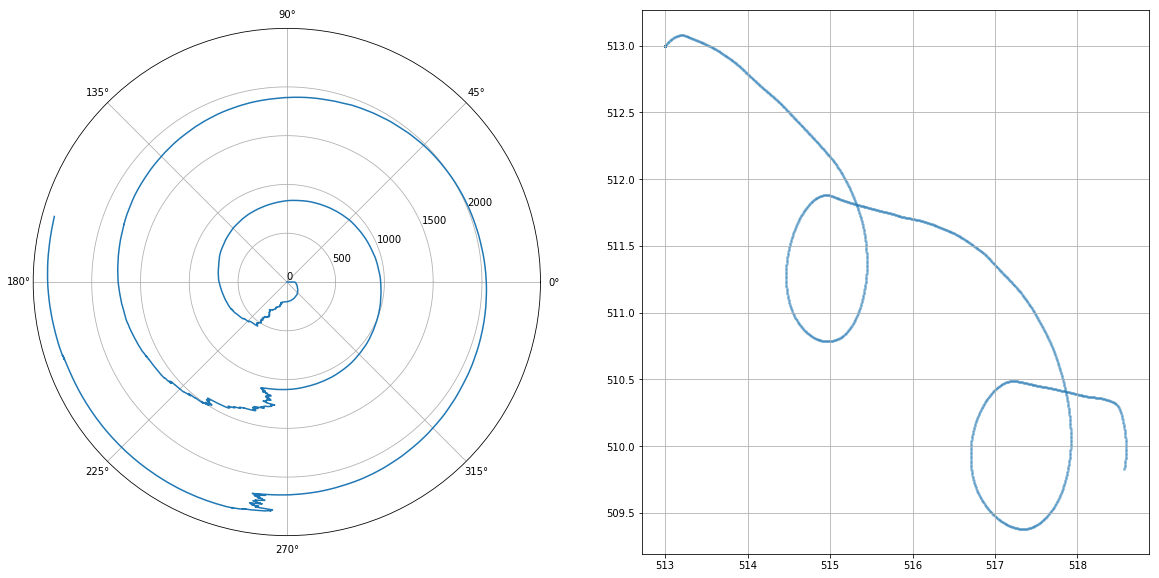

In [351]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1, projection='polar')
r=np.arange(0,df3[df3.trajectory__runNum == 4].shape[0])
plt.plot(np.pi*(df3[df3.trajectory__runNum == 4].trajectory__pOri_x%360)/180,r)
plt.yticks(np.arange(0, 2500, 500))
plt.subplot(1,2,2)
plt.scatter(df3[df3.trajectory__runNum == 4].trajectory__pPos_x,df3[df3.trajectory__runNum == 4].trajectory__pPos_y,s=3,alpha=0.2)

plt.grid()

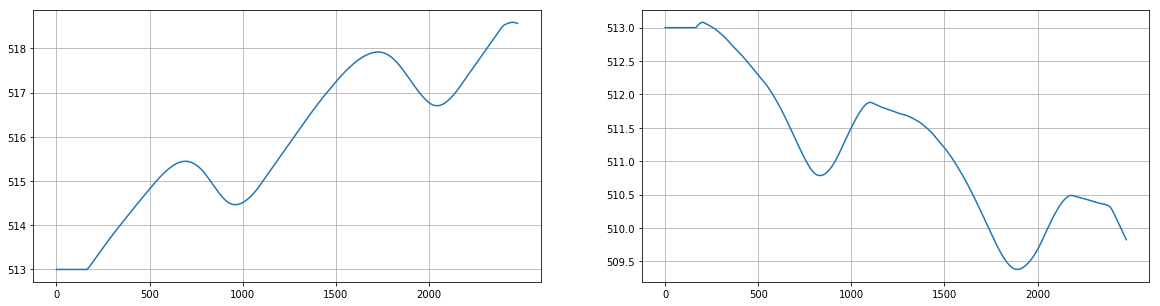

In [352]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(df3[df3.trajectory__runNum == 4].trajectory__pPos_x.values)
plt.xticks(np.arange(0, 2500, 500))
plt.grid()
plt.subplot(1,2,2)
plt.plot(df3[df3.trajectory__runNum == 4].trajectory__pPos_y.values)
plt.xticks(np.arange(0, 2500, 500))
plt.grid()

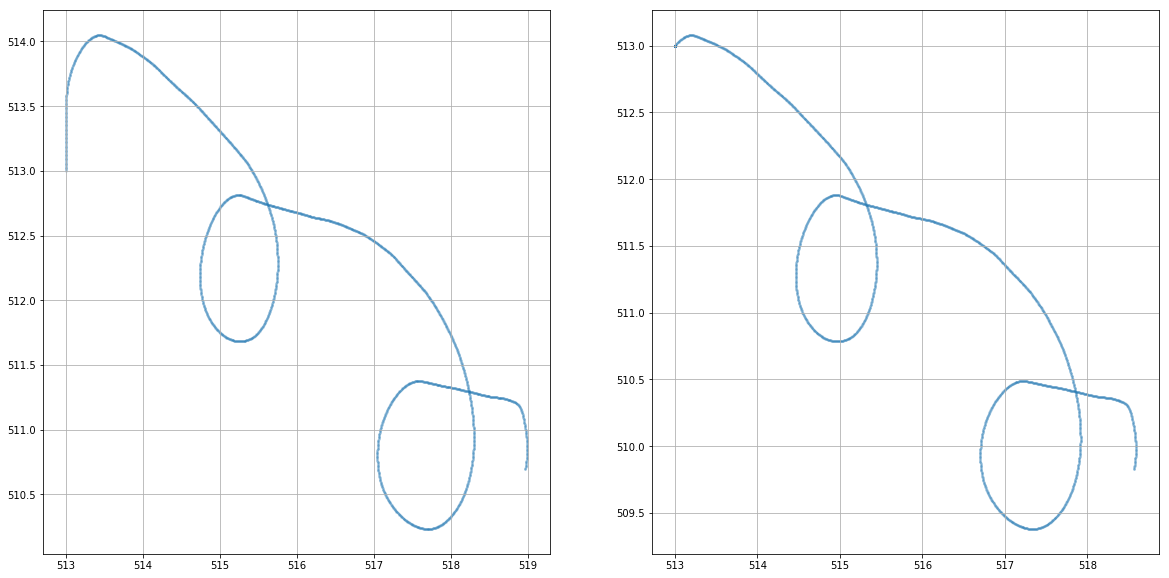

In [385]:
oris=(df3[df3.trajectory__runNum == 4].trajectory__pOri_x.values)%360
x,y=get_trajectories_from_orientations((513,513),oris,1/160)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(x,y,s=3,alpha=0.2)
plt.grid()
plt.subplot(1,2,2)
plt.scatter(df3[df3.trajectory__runNum == 4].trajectory__pPos_x,df3[df3.trajectory__runNum == 4].trajectory__pPos_y,s=3,alpha=0.2)
plt.grid()

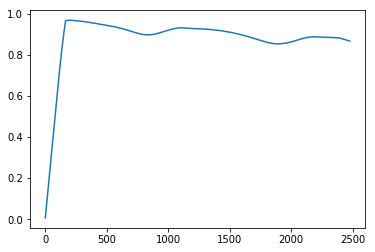

In [378]:
y_=df3[df3.trajectory__runNum == 4].trajectory__pPos_y.values
plt.plot(np.array(y[1:])-y_)

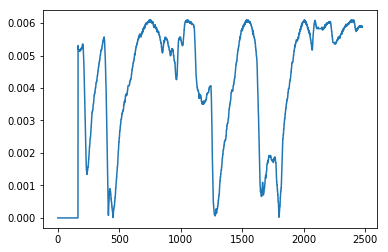

In [112]:
plt.plot(np.abs(np.diff(np.sqrt((df3[df3.trajectory__runNum == 1].trajectory__pPos_x.values)**2+(df3[df3.trajectory__runNum == 1].trajectory__pPos_y.values)**2))))

In [357]:
1/160

0.00625

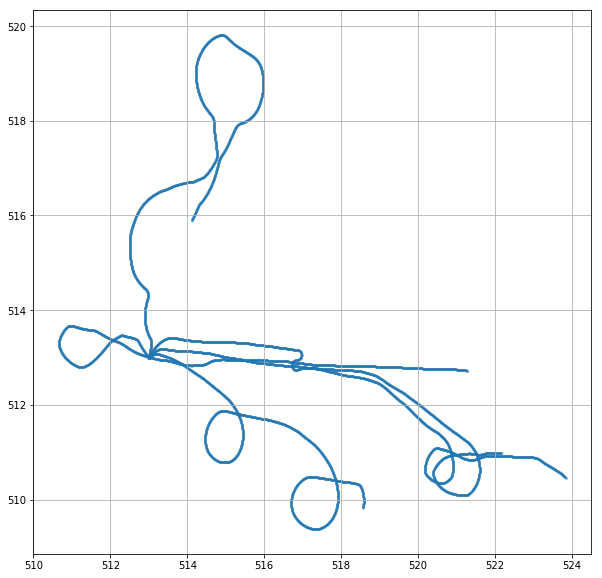

In [393]:
plt.figure(figsize=(10,10))
plt.scatter(df3.trajectory__pPos_x,df3.trajectory__pPos_y,s=3,alpha=0.2)
plt.grid()

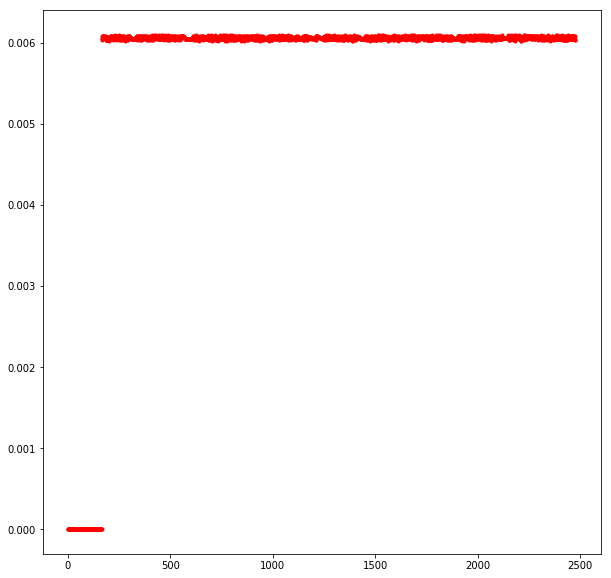

In [390]:
x_=np.diff(df3[df3.trajectory__runNum == 1].trajectory__pPos_x.values)
y_=np.diff(df3[df3.trajectory__runNum == 1].trajectory__pPos_y.values)
plt.figure(figsize=(10,10))
plt.plot(np.sqrt(x_**2+y_**2),"r.")

In [147]:
np.sin(-400*np.pi)

0.8509193596391765

In [3]:
df2=df[df.timeStamp=="2018-01-24__20~36~56"]

In [398]:
df2["orientation"]=df2.trajectory__pOri_x.values+90

/home/lsr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [406]:
df2["wind_direction"]=0

/home/lsr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [410]:
df2.wind_direction[df2.trajectory__case==1]=180
df2.wind_direction[df2.trajectory__case==2]=270
df2.wind_direction[df2.trajectory__case==3]=0
df2.wind_direction[df2.trajectory__case==0]=df2[df2.trajectory__case==0].orientation+180

/home/lsr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/lsr/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/lsr/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, 

In [419]:
df2.wind_direction=df2.trajectory__servoAngle-90

/home/lsr/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


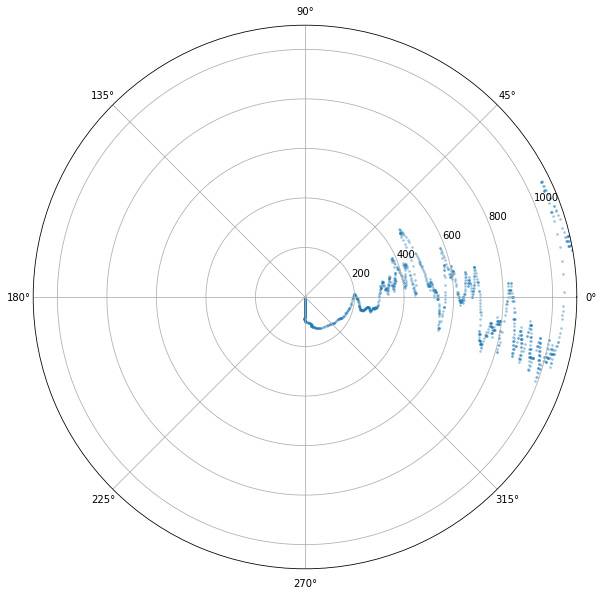

In [471]:
plt.figure(figsize=(10,10))
wind_dir_c1r1=df2[(df2.trajectory__case == 3) & (df2.trajectory__runNum==1)].wind_direction.values
wind_dir_c1r1=wind_dir_c1r1*np.pi/180
plt.subplot(1,1,1, projection='polar')
r=np.arange(0,wind_dir_c1r1.shape[0])
plt.scatter(wind_dir_c1r1,r,s=3,alpha=0.3)


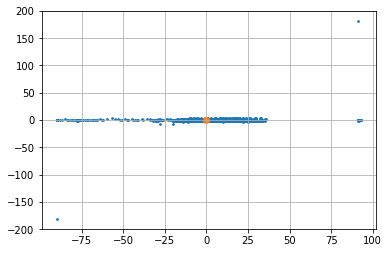

In [465]:
wind_dir_c1r1=df2[(df2.trajectory__case == 3) & (df2.trajectory__runNum==1)].wind_direction.values
wind_dir_c1r1[wind_dir_c1r1>180]=360-wind_dir_c1r1[wind_dir_c1r1>180]
plt.scatter(wind_dir_c1r1[1:],np.diff(wind_dir_c1r1),s=3)
plt.scatter(0,0)
plt.grid()

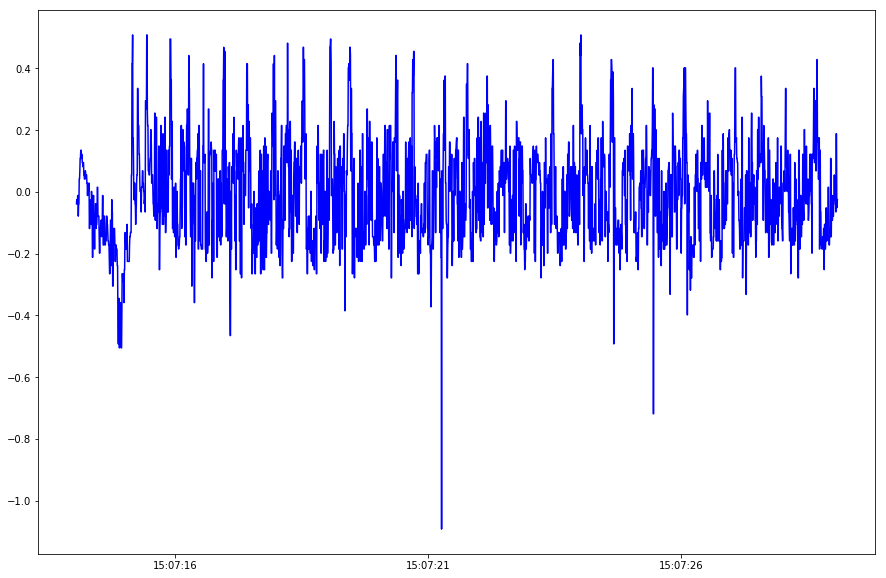

In [480]:
plt.figure(figsize=(15,10))
plt.plot(df2[(df2.trajectory__case == 1) & (df2.trajectory__runNum==1)].trajectory__wbad,"b")

In [426]:
b=a

In [427]:
a=5

In [428]:
b

9

In [424]:
a

9

In [4]:
df2.to_csv("df_alliend_data.csv")

In [7]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [33]:
t1=df2[(df2.trajectory__runNum==1) & (df2.trajectory__case==2)].trajectory__wbad.values
t2=df2[(df2.trajectory__runNum==2) & (df2.trajectory__case==0)].trajectory__wbad.values

In [17]:
distance, path = fastdtw(t1, t2, dist=euclidean)

In [20]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [ ]:
path = dtw.warping_path(t1[:200], t2[:200])

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f68d6231eb8>,
       dtype=object))

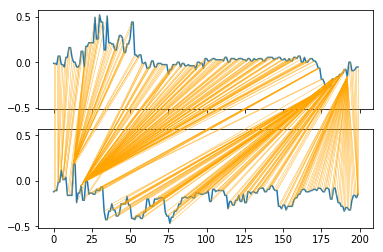

In [25]:
dtwvis.plot_warping(t1[:200], t2[:200], path)

In [29]:
distance = dtw.distance(t1, t2)

In [30]:
distance

4.0225755603254365

(279.5337636025614,
 [(0, 0),
  (1, 1),
  (2, 2),
  (3, 3),
  (4, 3),
  (5, 3),
  (6, 3),
  (7, 3),
  (8, 3),
  (9, 3),
  (10, 3),
  (11, 3),
  (12, 3),
  (13, 3),
  (14, 3),
  (15, 3),
  (16, 3),
  (17, 4),
  (18, 5),
  (19, 5),
  (20, 5),
  (21, 5),
  (22, 5),
  (23, 5),
  (24, 5),
  (25, 5),
  (26, 5),
  (27, 5),
  (28, 5),
  (29, 5),
  (30, 5),
  (31, 5),
  (32, 5),
  (33, 5),
  (34, 5),
  (35, 5),
  (36, 5),
  (37, 5),
  (38, 5),
  (39, 5),
  (40, 5),
  (41, 5),
  (42, 5),
  (43, 5),
  (44, 5),
  (45, 5),
  (46, 5),
  (47, 5),
  (48, 5),
  (49, 5),
  (50, 5),
  (51, 5),
  (52, 5),
  (53, 5),
  (54, 5),
  (55, 5),
  (56, 5),
  (57, 5),
  (58, 6),
  (59, 6),
  (60, 6),
  (61, 6),
  (62, 6),
  (63, 6),
  (64, 6),
  (65, 6),
  (66, 6),
  (67, 6),
  (68, 6),
  (69, 6),
  (70, 6),
  (71, 6),
  (72, 6),
  (73, 6),
  (74, 6),
  (75, 6),
  (76, 6),
  (77, 6),
  (78, 6),
  (79, 6),
  (80, 6),
  (81, 6),
  (82, 6),
  (83, 6),
  (84, 6),
  (85, 6),
  (86, 6),
  (87, 6),
  (88, 6),
  (89, 6),
